In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines

 # Read the cleaned data

In [2]:
df = pd.read_excel("../haircut_cleanup.xlsx")
df.head()

,Tip amount,Time,Day,Culture,Married,Age
0,0.0,17,Fri,I,NM,30
1,1.0,14,Tue,E,NM,10
2,1.0,19,Tue,I,NM,35
3,2.0,17,Mon,I,NM,35
4,2.0,12,Fri,M,NM,15


 Exploring the differences between married and unmarried customers

In [3]:
df.groupby("Married").mean()

,Tip amount,Time,Age
Married,,,
M,6.224359,13.500000,40.910256
NM,6.808442,13.935065,26.896104


<AxesSubplot:xlabel='Married'>

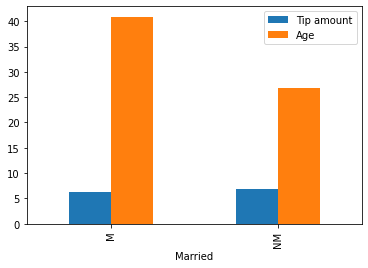

In [4]:
df_no_time = df.drop(columns=["Time"])
df_no_time.groupby("Married").mean().plot.bar()

 Exploring the mean tip amount differences for married and unmarried customers, binned by their age.

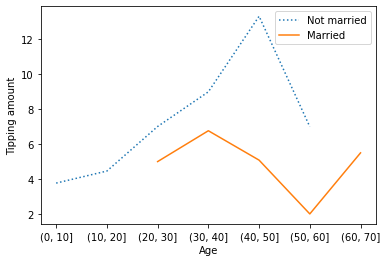

In [5]:
# Married and not married split
df_m = df.drop(df.loc[df["Married"] == "NM"].index)
df_nm = df.drop(df.loc[df["Married"] == "M"].index)

# Binned by age in 10 year intervals
bins = pd.cut(df["Age"], list(range(0, 100, 10)))

df_nm.groupby(bins)["Tip amount"].mean().plot(linestyle="dotted")
df_m.groupby(bins)["Tip amount"].mean().plot.line().set_ylabel("Tipping amount")
plt.legend(["Not married", "Married"])
plt.savefig("../report/figures/tip_amount_by_age.pdf")

 Exploring if culture has an impact on tip amounts

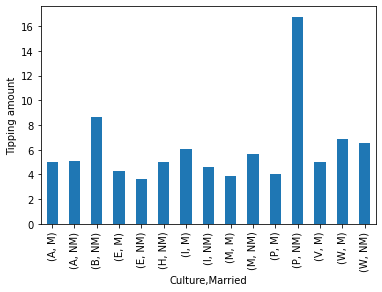

In [6]:
# If dividing into colours, remember the you cannot use everyother coloumn(missing values)
df.groupby(["Culture", "Married"])["Tip amount"].mean().plot.bar().set_ylabel(
    "Tipping amount"
)

plt.savefig("../report/figures/culture_impact.pdf", bbox_inches="tight")

 Exploring if the time of day has an impact on tip amounts and the age of the customer

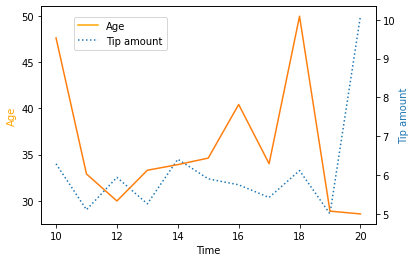

In [7]:
df.groupby("Time")["Age"].mean().plot(linestyle="dotted").set_ylabel(
    "Age", color="orange"
)
df.groupby("Time")["Tip amount"].mean().plot.line(secondary_y=True).set_ylabel(
    "Tip amount", color="#1f77b4"
)

age_line = mlines.Line2D([], [], color="orange")
tip_amount_line = mlines.Line2D([], [], linestyle="dotted", color="#1f77b4")
plt.legend([age_line, tip_amount_line], ["Age", "Tip amount"], loc=[0.1, 0.8])
plt.savefig("../report/figures/time_of_day_and_age.pdf")